In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

In [57]:
frame = pdr.get_data_yahoo('goog', dt.datetime(2013, 5, 1), dt.datetime.now())

[*********************100%***********************]  1 of 1 completed


In [58]:
frame.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-16,2760.000000,2779.810059,2723.314941,2778.320068,2778.320068,902000
2021-08-17,2763.820068,2774.370117,2735.750000,2746.010010,2746.010010,1063600
2021-08-18,2742.310059,2765.879883,2728.419922,2731.399902,2731.399902,746700
2021-08-19,2709.350098,2749.040039,2707.120117,2738.270020,2738.270020,914800
2021-08-20,2741.659912,2772.290039,2729.340088,2768.739990,2768.739990,778200


In [59]:
frame['Log_Returns'] = np.log(frame['Close']/frame['Close'].shift(1))

In [116]:
frame['Volatility'] =(frame['Log_Returns'].rolling(252).std()*np.sqrt(252))

In [117]:
frame

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Volatility
Date,,,,,,,,
2013-04-30,407.970825,412.274689,407.313293,410.745422,410.745422,4630692,NaN,NaN
2013-05-01,410.092865,410.820160,406.655762,408.683167,408.683167,2920907,-0.005033,NaN
2013-05-02,408.518768,415.716797,407.995728,413.256012,413.256012,4051730,0.011127,NaN
2013-05-03,416.917297,421.818909,416.439087,421.280945,421.280945,5044036,0.019233,NaN
2013-05-06,422.546204,429.315826,422.546204,429.166382,429.166382,4298652,0.018545,NaN
...,...,...,...,...,...,...,...,...
2021-08-16,2760.000000,2779.810059,2723.314941,2778.320068,2778.320068,902000,0.003678,0.264483
2021-08-17,2763.820068,2774.370117,2735.750000,2746.010010,2746.010010,1063600,-0.011698,0.264823
2021-08-18,2742.310059,2765.879883,2728.419922,2731.399902,2731.399902,746700,-0.005335,0.263829


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bbf6110>,
      dtype=object)

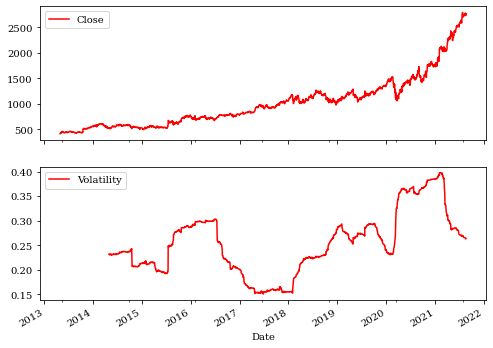

In [137]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family']='serif'

frame[['Close', 'Volatility']].plot(subplots=True, color='red', figsize=(8,6))

In [ ]:
# Here we can see that getting data, manipulating, and visualising it is very easy with python. 
# Even over thousands of entries it is quick and straightforward  

##  ^ Efficient

In [119]:
loops=25000000
from math import *
a = range(1,loops)

def f(x):
    return 3 * log(x) + cos(x)**2

%timeit r = [f(x) for x in a]

1 loop, best of 5: 9.6 s per loop


In [124]:
a = np.arange(1, loops)
%timeit v = 3 * np.log(a) + np.cos(a)**2

1 loop, best of 5: 871 ms per loop


In [123]:
# There are many ways to do the same thing
# However, some are considerably faster than others
# Consider a loop time of ~10s for the first computation vs loop time of 0.9s for the second
# Picking the right library reduced computation time by 10x!
# We can go even further using specialised libraries
# numex compiles the expression to improve on NumPy's functionality:

In [127]:
import numexpr as ne

ne.set_num_threads(1)
f = '3* log(a) + cos(a)**2'

%timeit h = ne.evaluate(f)

1 loop, best of 5: 671 ms per loop


In [ ]:
# 0.67s to run through 25000000 calculations
# 93% reduction in runtime
# We can go even further

In [134]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)



1 loop, best of 5: 182 ms per loop
$S_t$


## ^ Productive

In [138]:
# Instead of quant teams prototyping and passing to development teams, creating
# redundant blocks of code and time-wasting reimplementation, 
# Python allows for a consistent infrastructure for faster model deployment